## Business Problem
Build a Book Recommendation system for customer to get good experience while shopping. 

### step 1.importing libreries and understand the data

In [1]:
%matplotlib inline 
# for data visulization in jupyter nootbook
import pandas as pd   # for data frmae
import matplotlib.pyplot as plt  # for data visulazation
import seaborn as sns  # for data visulization
import numpy as np # for algebra
import warnings # to aviod warning masssages when code run
warnings.filterwarnings("ignore")
from sklearn.metrics.pairwise import cosine_similarity  # Compute cosine similarity between samples in X and Y.
from scipy import sparse  #  sparse matrix package for numeric data.
from scipy.sparse.linalg import svds # svd algorithm
from operator import itemgetter, attrgetter

### step 2.loading data and cross cheaking

In [16]:
import os
os.chdir(r"C:\Users\dell\OneDrive\Desktop\python")

In [17]:
rating=pd.read_csv("Book_Rating.csv")
user=pd.read_csv("Users.csv")
book_info=pd.read_csv("Books.csv")

In [18]:
rating.head()

,User_id,Book_id,Book_Rating
0,276725,0,0
1,276726,0,5
2,276727,0,0
3,276729,0,3
4,276729,0,6


In [19]:
user.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [20]:
book_info.head()

,Book_id,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [21]:
rating.shape

(9999, 3)

In [22]:
rating.head()

,User_id,Book_id,Book_Rating
0,276725,0,0
1,276726,0,5
2,276727,0,0
3,276729,0,3
4,276729,0,6


In [23]:
rating.columns = ['user_id', 'Book_id', 'rating'] 

In [24]:
rating.head()

,user_id,Book_id,rating
0,276725,0,0
1,276726,0,5
2,276727,0,0
3,276729,0,3
4,276729,0,6


In [25]:
n_users = rating.user_id.unique().shape[0]
n_items = rating.Book_id.unique().shape[0]
print(n_users,n_items)

941 5277


In [26]:
book_info.head()

,Book_id,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [27]:
Book_rating=pd.merge(book_info,rating, on="Book_id")
Book_rating.head()

,Book_id,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,user_id,rating
0,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,276939,0
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,276939,0
2,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,276943,0
3,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,276946,0
4,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,276949,8


In [28]:
Book_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4788 entries, 0 to 4787
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Book_id              4788 non-null   object
 1   Book_Title           4788 non-null   object
 2   Book_Author          4788 non-null   object
 3   Year_Of_Publication  4788 non-null   object
 4   Publisher            4788 non-null   object
 5   Image-URL-S          4788 non-null   object
 6   Image-URL-M          4788 non-null   object
 7   Image-URL-L          4788 non-null   object
 8   user_id              4788 non-null   int64 
 9   rating               4788 non-null   int64 
dtypes: int64(2), object(8)
memory usage: 411.5+ KB


In [29]:
Book_rating['Book_id']= Book_rating['Book_id'].astype('int64')

In [30]:
Book_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4788 entries, 0 to 4787
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Book_id              4788 non-null   int64 
 1   Book_Title           4788 non-null   object
 2   Book_Author          4788 non-null   object
 3   Year_Of_Publication  4788 non-null   object
 4   Publisher            4788 non-null   object
 5   Image-URL-S          4788 non-null   object
 6   Image-URL-M          4788 non-null   object
 7   Image-URL-L          4788 non-null   object
 8   user_id              4788 non-null   int64 
 9   rating               4788 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 411.5+ KB


In [31]:
Book_rating.head()

,Book_id,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,user_id,rating
0,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,276939,0
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,276939,0
2,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,276943,0
3,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,276946,0
4,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,276949,8


In [32]:
Book_rating.describe()

,Book_id,user_id,rating
count,4.788000e+03,4788.000000,4788.000000
mean,1.663258e+07,272210.915414,1.621972
std,1.084369e+07,40141.799984,3.186291
min,0.000000e+00,16.000000,0.000000
25%,6.497991e+06,277648.500000,0.000000
50%,2.036075e+07,278418.000000,0.000000
75%,2.758770e+07,278418.000000,0.000000
max,4.327106e+07,278851.000000,10.000000


## Finding similarities between Books

In [34]:
# Calculate mean rating of all movies 
Book_Stats = pd.DataFrame(Book_rating.groupby('Book_Title')['rating'].mean())
Book_Stats.head()

,rating
Book_Title,
101 Unuseless Japanese Inventions,0.000000
1939,0.000000
203 Ways to Be Supremely Successful in the New World of Selling,0.000000
253,4.962963
3 Pandas Planting : Counting Down to Help the Earth,0.000000


In [36]:
Book_Stats.sort_values(by = ['rating'],ascending=False).head()

,rating
Book_Title,
Surprised By Joy,10.0
Demolition Angel,10.0
A bridge of magpies,10.0
EAGLE AGAINST THE SUN (THE AMERICAN WAR WITH JAPAN),10.0
The Second Deadly Sin,10.0


In [37]:
Book_Stats['Number_user_rated'] = pd.DataFrame(Book_rating.groupby('Book_Title')['rating'].count())
Book_Stats.head()

,rating,Number_user_rated
Book_Title,,
101 Unuseless Japanese Inventions,0.000000,2
1939,0.000000,3
203 Ways to Be Supremely Successful in the New World of Selling,0.000000,1
253,4.962963,27
3 Pandas Planting : Counting Down to Help the Earth,0.000000,1


In [38]:
Book_Stats.sort_values(by =['Number_user_rated'], ascending=False).head()

,rating,Number_user_rated
Book_Title,,
Once upon a More Enlightened Time: More Politically Correct Bedtime Stories,0.144928,69
"Lion, the Witch and the Wardrobe",0.525424,59
Billy,0.000000,44
Unless : A Novel,0.000000,43
Joshua,0.425000,40


<AxesSubplot:>

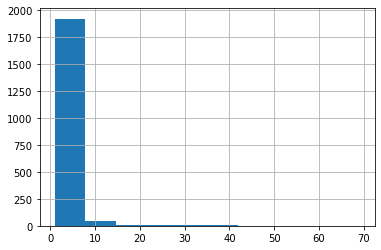

In [39]:
Book_Stats['Number_user_rated'].hist()

From the output, you can see that most of the books have received less than 5 ratings. It is evident that the data has a weak normal distribution with the mean of around 2.5. There are a few outliers in the data

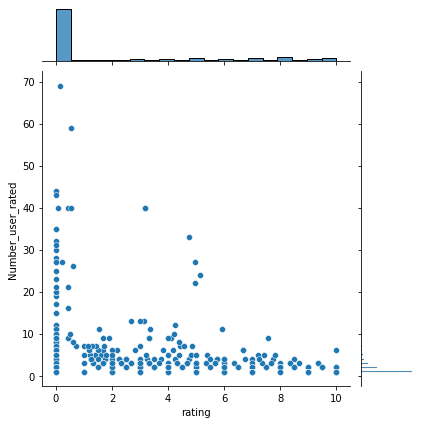

In [40]:
sns.jointplot(x='rating', y='Number_user_rated', data=Book_Stats)

The graph shows that, in general, Books with higher average ratings actually have more number of ratings, compared with Books that have lower average ratings.

### similarities

We will use the correlation between the ratings of a Books as the similarity metric.
To see the corrilation we will create Pivot table between User_ID ,Books, ratings

In [42]:
User_Book_Rating = Book_rating.pivot_table (index='user_id', columns='Book_Title', values='rating')
User_Book_Rating.head()

Book_Title,101 Unuseless Japanese Inventions,1939,203 Ways to Be Supremely Successful in the New World of Selling,253,3 Pandas Planting : Counting Down to Help the Earth,4:50 From Paddington,5 Easy Steps to Becoming a Witch,7 Days to a Magickal New You,8 Weeks to a Well-Behaved Child: A Failsafe Program for Toddlers Through Teens,A Book of Railway Journeys,...,Z for Zachariah,Zen,Zen Attitude,Zip Goes Zebra (Sweet Pickles Series),Zodiacs: Taurus: Black Out (Zodiac),"\Any Grooming Hints for Your Fans, Rollie?\"" (A Doonesbury book)""","\Girls' Night Out\""/\""Boys' Night In\""""","\Speaking of Inalienable Rights, Amy ...\"" (A Doonesbury book)""","\What Do We Have for the Witnesses, Johnnie?\"" (A Doonesbury book)""",Â¡DÃ­melo tu!
user_id,,,,,,,,,,,,,,,,,,,,,
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## correlation similarities

In [44]:
Similarity = User_Book_Rating.corrwith(User_Book_Rating['253'])
Similarity.head()

Book_Title
101 Unuseless Japanese Inventions                                  NaN
1939                                                               NaN
203 Ways to Be Supremely Successful in the New World of Selling    NaN
253                                                                1.0
3 Pandas Planting : Counting Down to Help the Earth                NaN
dtype: float64

In [45]:
corr_similar = pd.DataFrame(Similarity, columns=['Correlation'])
corr_similar.head()

,Correlation
Book_Title,
101 Unuseless Japanese Inventions,NaN
1939,NaN
203 Ways to Be Supremely Successful in the New World of Selling,NaN
253,1.0
3 Pandas Planting : Counting Down to Help the Earth,NaN


In [46]:
corr_similar.sort_values(['Correlation'], ascending= False).head()

,Correlation
Book_Title,
253,1.0
101 Unuseless Japanese Inventions,NaN
1939,NaN
203 Ways to Be Supremely Successful in the New World of Selling,NaN
3 Pandas Planting : Counting Down to Help the Earth,NaN


In [47]:
Book_Stats.head()

,rating,Number_user_rated
Book_Title,,
101 Unuseless Japanese Inventions,0.000000,2
1939,0.000000,3
203 Ways to Be Supremely Successful in the New World of Selling,0.000000,1
253,4.962963,27
3 Pandas Planting : Counting Down to Help the Earth,0.000000,1


In [48]:
corr_similar_num_of_rating = corr_similar.join(Book_Stats['Number_user_rated'])
corr_similar_num_of_rating.sort_values(['Correlation'], ascending= False).head(15)

,Correlation,Number_user_rated
Book_Title,,
253,1.0,27
101 Unuseless Japanese Inventions,NaN,2
1939,NaN,3
203 Ways to Be Supremely Successful in the New World of Selling,NaN,1
3 Pandas Planting : Counting Down to Help the Earth,NaN,1
4:50 From Paddington,NaN,5
5 Easy Steps to Becoming a Witch,NaN,2
7 Days to a Magickal New You,NaN,2
8 Weeks to a Well-Behaved Child: A Failsafe Program for Toddlers Through Teens,NaN,1


In [49]:
corr_similar_num_of_rating[corr_similar_num_of_rating ['Number_user_rated']>50].sort_values('Correlation', ascending=False).head(10)

,Correlation,Number_user_rated
Book_Title,,
"Lion, the Witch and the Wardrobe",NaN,59
Once upon a More Enlightened Time: More Politically Correct Bedtime Stories,NaN,69


In [50]:
def get_recommendations(title):
    # Get the movie ratings of the movie that matches the title
    Book_rating = User_Book_Rating[title]

    # Get the  similarity corrilated  scores of all movies with that movie
    sim_scores = User_Book_Rating.corrwith(Book_rating)

    # Sort the movies based on the similarity scores
    corr_title = pd.DataFrame(sim_scores, columns=['Correlation'])
    
    # Removing na values 
    corr_title.dropna(inplace=True)
    
    corr_title = corr_title.join(Book_Stats['Number_user_rated'])
    
    # Return the top 10 most similar movies
    return corr_title[corr_title ['Number_user_rated']>50].sort_values('Correlation', ascending=False).head()

In [53]:
get_recommendations('A Book of Railway Journeys')

,Correlation,Number_user_rated
Book_Title,,


In [54]:
get_recommendations('Zen Attitude')

,Correlation,Number_user_rated
Book_Title,,


# Cosin Similarities

In [55]:
Book_rating= Book_rating.reset_index(drop=True) 


In [57]:
Book_cosine = Book_rating[['user_id','Book_id','rating']]
Book_cosine.head()

,user_id,Book_id,rating
0,276939,2005018,0
1,276939,2005018,0
2,276943,2005018,0
3,276946,2005018,0
4,276949,2005018,8


* Sparse matrix we are going to create using above data      
* A sparse matrix in Coordinate format this is also called as triplet format

In [59]:
value = Book_cosine.rating
row = Book_cosine.user_id
column = Book_cosine.Book_id

R = sparse.coo_matrix((value,(row,column))).tocsr()
print ('{0}x{1} user by Books matrix'.format(*R.shape)) 

278852x43271058 user by Books matrix


In [60]:
print(R)

  (16, 33034935)	0
  (17, 33048205)	0
  (69, 34524575)	6
  (69, 34531042)	3
  (69, 34531428)	8
  (73, 34532532)	5
  (87, 34538184)	8
  (88, 34538430)	7
  (91, 34538430)	9
  (92, 34538430)	7
  (97, 34540047)	7
  (99, 34541389)	15
  (99, 34542252)	16
  (99, 34543241)	3
  (99, 34543448)	10
  (100, 34543630)	0
  (162, 37302522)	5
  (178, 37322687)	6
  (182, 37326433)	0
  (182, 37326447)	0
  (182, 37328960)	3
  (183, 37329087)	0
  (183, 37371078)	7
  (183, 37379035)	0
  (183, 37382503)	14
  :	:
  (278843, 30802377)	0
  (278843, 30802873)	0
  (278843, 30803012)	0
  (278843, 30842573)	7
  (278843, 30844924)	7
  (278843, 30849934)	0
  (278843, 30850746)	8
  (278843, 30854903)	0
  (278843, 30859670)	8
  (278843, 30865727)	0
  (278843, 30882591)	0
  (278843, 30885906)	0
  (278843, 30894344)	0
  (278843, 30897262)	0
  (278843, 30899249)	9
  (278843, 30899788)	8
  (278843, 30899915)	0
  (278843, 30914566)	7
  (278843, 30940559)	0
  (278843, 30949890)	0
  (278843, 30957648)	7
  (278843, 30965268)	0

In [61]:
find_similarities =(R.T) # We are transposing the matrix 
print (find_similarities.shape)

(43271058, 278852)


In [62]:
print(find_similarities)


  (33034935, 16)	0
  (33048205, 17)	0
  (34524575, 69)	6
  (34531042, 69)	3
  (34531428, 69)	8
  (34532532, 73)	5
  (34538184, 87)	8
  (34538430, 88)	7
  (34538430, 91)	9
  (34538430, 92)	7
  (34540047, 97)	7
  (34541389, 99)	15
  (34542252, 99)	16
  (34543241, 99)	3
  (34543448, 99)	10
  (34543630, 100)	0
  (37302522, 162)	5
  (37322687, 178)	6
  (37326433, 182)	0
  (37326447, 182)	0
  (37328960, 182)	3
  (37329087, 183)	0
  (37371078, 183)	7
  (37379035, 183)	0
  (37382503, 183)	14
  :	:
  (30802377, 278843)	0
  (30802873, 278843)	0
  (30803012, 278843)	0
  (30842573, 278843)	7
  (30844924, 278843)	7
  (30849934, 278843)	0
  (30850746, 278843)	8
  (30854903, 278843)	0
  (30859670, 278843)	8
  (30865727, 278843)	0
  (30882591, 278843)	0
  (30885906, 278843)	0
  (30894344, 278843)	0
  (30897262, 278843)	0
  (30899249, 278843)	9
  (30899788, 278843)	8
  (30899915, 278843)	0
  (30914566, 278843)	7
  (30940559, 278843)	0
  (30949890, 278843)	0
  (30957648, 278843)	7
  (30965268, 278843)	0

In [63]:
print (find_similarities.shape)

(43271058, 278852)


In [64]:
find_similarities=np.array(find_similarities)

In [65]:
print (find_similarities.shape)

()


In [66]:

def Get_Top_Similarbooks(model, Book_id, n=5):
    return model[Book_id].sorted(find_similarities, key=itemgetter(2), reverse=True)[::-1][:n].tolist()  # Here movie id is index 
 
    # [::-1] sort in reverse order like 1234=4321 
    # argsort sorting data in ascending order 
    # [:n] select top 5 only 

In [67]:
book_info.head()

,Book_id,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [68]:
book_info.iloc[Get_Top_Similarbooks(find_similarities, 4)] # iloc = taking subset

IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

In [69]:
def get_bookid_by_book_name(Book_Title):
    Book_id=[]                #### empty list
    listOfbooks=book_info['Book_Title']   ### all movie title name
    listOfbooksID=book_D['Book_id']    ### all movie id  
    for i in range(len(listOfbooks)):       
        if listOfbooks[i] == Book_Title :    # if movie title match 
            book_id=listOfbooksID[i]         # give me movie id 
    return  book_id

In [70]:
def similar_book(id):
    df=book_info.iloc[Get_Top_Similarbooks(find_similarities, id)]
    return df[["Book_id","Book_Title"]]

In [71]:
get_bookid_by_book_name("The Kitchen God's Wife")

NameError: name 'book_D' is not defined

In [72]:
similar_book(get_bookid_by_book_name("The Kitchen God's Wife"))

NameError: name 'book_D' is not defined